In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from io import StringIO
s='''area,price
26,5500
30,5650
32,6100
36,6800
40,7250
'''

df=pd.read_csv(StringIO(s))
df.columns

Index(['area', 'price'], dtype='object')

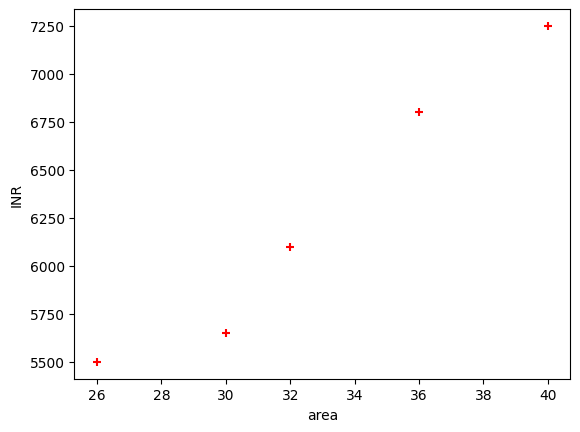

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('INR')
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df.price)

LinearRegression()

In [5]:
print(model.coef_)
model.intercept_


[135.78767123]


1806.1643835616442

In [6]:
model.predict(np.array([50,]).reshape(-1,1))

C:\Users\Utsav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8595.54794521])

In [7]:
# y = mx+c
model.coef_*50+model.intercept_

array([8595.54794521])

In [8]:
# We have a list of areas for which we want to predict the proces
area = [10, 15, 23, 29, 35, 43, 50]
y_hat = model.predict(np.array(area).reshape(-1,1))

dfn = pd.DataFrame({
    'area': area,
    'predicted_prices': y_hat
})

C:\Users\Utsav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


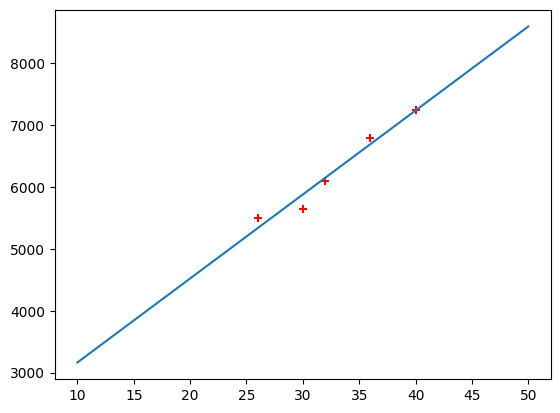

In [9]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(dfn.area, dfn.predicted_prices)

#### Exercise - Predict Per Capita Income 

In [10]:
data = pd.read_csv('data/1_linreg_canada_per_capita_income.csv')
data.head()

,year,per_capita_income_USD
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


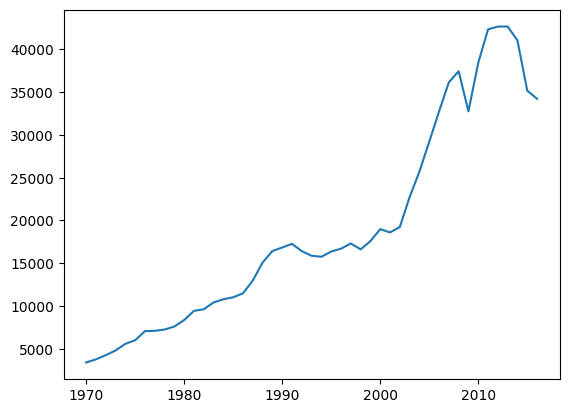

In [11]:
import matplotlib.pyplot as plt
plt.plot(data.year, data.per_capita_income_USD)

In [12]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(data[['year']], data.per_capita_income_USD)

LinearRegression()

In [13]:
predict_years = list(range(2017, 2026))
predicted_percapita = model.predict(np.array(predict_years).reshape(-1, 1))


C:\Users\Utsav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
dfn = pd.DataFrame({
    'year': predict_years,
    'predicted_percapita': predicted_percapita
})
dfn

,year,predicted_percapita
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471


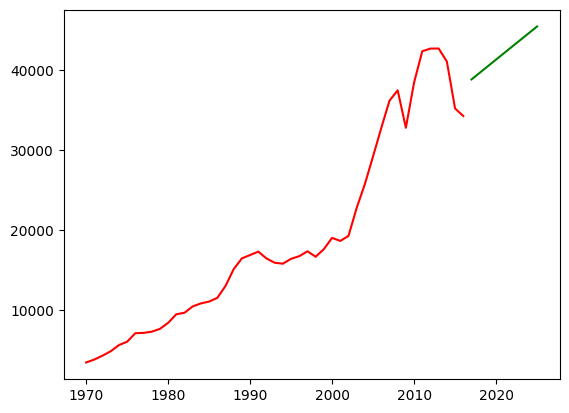

In [15]:
plt.plot(data.year, data.per_capita_income_USD, color='red')
plt.plot(dfn.year, dfn.predicted_percapita, color='green')

In [16]:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [25]:
with open('model_pickle', 'rb') as f:
    model = pickle.load(f)

In [19]:
model.predict(np.array([2030]).reshape(-1,1))

C:\Users\Utsav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49573.34484664])

In [21]:
import joblib

joblib.dump(model, 'model_joblib')

['model_joblib']

In [22]:
model = joblib.load('model_joblib')

model.predict(np.array([2027]).reshape(-1, 1))

C:\Users\Utsav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47087.94962098])

In [26]:
model.coef_

array([828.46507522])

In [27]:
model.intercept_

-1632210.7578554575

In [30]:
model.score(data[['year']], data.per_capita_income_USD)

0.890916917957032